# Data descritization
data discritization is the process of converting continuous data into discrete data. It is used to convert numerical data which is difficult to understand into categorical data. It is also called as **binning**, where bin is an interval of values.



In [139]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [140]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [141]:
# impute missing values by median method
df['age']=df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())

<Axes: xlabel='age', ylabel='Count'>

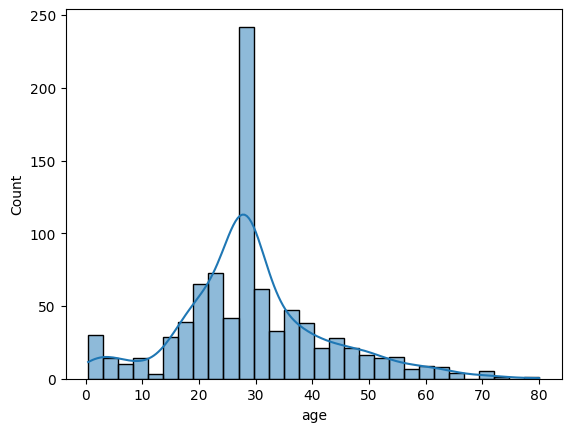

In [142]:
sns.histplot(df['age'], kde=True)

In [143]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [144]:
# discretize age
age_discritizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
df['age_bin']=age_discritizer.fit_transform(df[['age']])
df.head()

c:\Users\musad\miniconda3\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


<Axes: xlabel='age', ylabel='Count'>

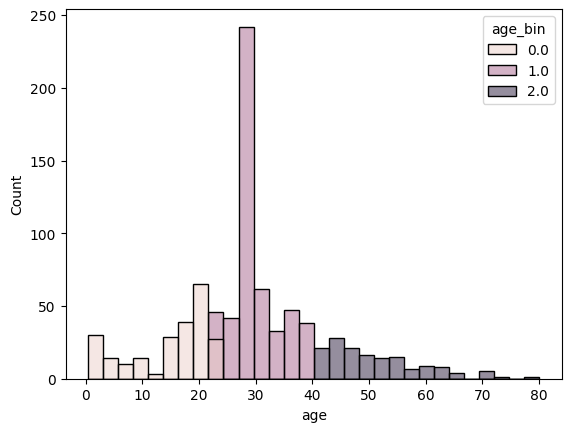

In [145]:
sns.histplot(df, x='age', hue='age_bin')

In [146]:
# pandas for manual binning
bins=[0, 20, 40, 60, 80, 100]
labels=['child', 'young', 'middle', 'old', 'very_old']
df['age_bin_manual']=pd.cut(df['age'], bins=bins, labels=labels)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin_manual
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,young
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,young
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0,young


<Axes: xlabel='age', ylabel='Count'>

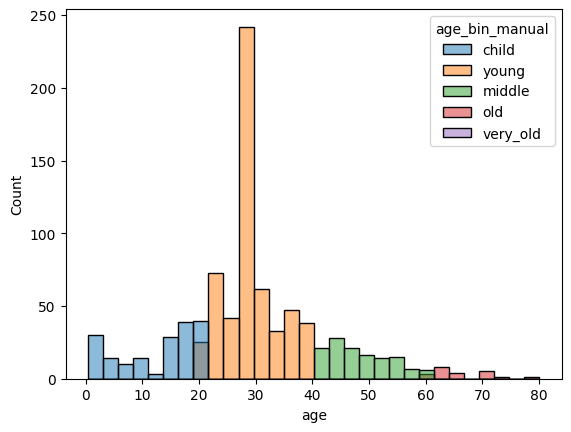

In [147]:
sns.histplot(df, x='age', hue='age_bin_manual')

# data discrituization methods note book